## Using PCA with MNIST

PCA means Principal Component Analysis. The basic idea is, for a piece of data, we can use several components and scale values in a equation to describe that piece of data.
$$
\begin{align}
X = & a_1 s_1+a_2 s_2+ ... +a_L s_L+e
\end{align}
$$
And here, for a1 to aL, they are components of the X, and the e is the residual error.
<br>
Also, with using some eigenvectors and eigenvalues, we can decomposition the X to a low dimentional components.

Here, I will use the package of "sklearn.decomposition", it has the the function of "PCA()", which is for the decomposition.

In [1]:
from sklearn.decomposition import PCA
import scipy
from PIL import Image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import math

For the data set, I am using the MNIST. It contains many hand-written digits, and for each charater, from '0' to '9', it contains thousands of samples. Thus, we can use these samples to calculate the covariance.

In [2]:
#read the data
def read_data(train_fname_img,TRAIN_SET_NUM):
    train_img_list = []
    with open(train_fname_img, 'rb') as tfimg:
        tfimg.read(16)
        for i in range(0,TRAIN_SET_NUM):
            dataline = tfimg.read(784)
            intline = list(dataline)
            intline = np.array(intline)
            train_img_list.append(np.copy(intline))
    return train_img_list

In [3]:
MNIST_data = read_data('train-images-idx3-ubyte',60000)
MNIST_data = np.array(MNIST_data)

In [4]:
print(MNIST_data.shape)

(60000, 784)


We see that it contains 60,000 smaples of digits, and for each sample, it is an image that contains 784 pixels, which is 28 by 28.

Now we can build a PCA model.

In [5]:
pca = PCA()
pca.fit(MNIST_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

With this package, we can easily calculate the variance and covariance.

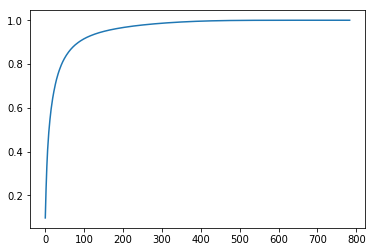

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

This is a plot for the variance ratio. From the plot, we notice that among 784 components, we can achieve the 90% accuracy by only using first 100 components, and if we use the first 400 components, it will achieve nearly 100%. Let's test it.

In [7]:
pca10 = PCA(10)
components10 = pca10.fit_transform(MNIST_data)

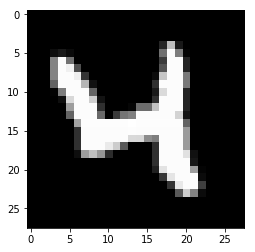

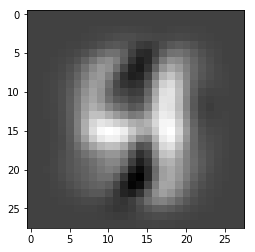

In [8]:
in_10_20 = (pca10.inverse_transform(components10))[20]
imgplot = plt.imshow(MNIST_data[20].reshape(28,28),'gray')
plt.show()
imgplot = plt.imshow(in_10_20.reshape(28,28),'gray')
plt.show()

That is the result of using 10 components. From the original image, we know the answer is '4'. The result image do has a shape of '4', but it just far away from the original image.

In [10]:
diff_10_20 = abs(in_10_20 - MNIST_data[20])
print(np.sum(diff_10_20)/(784*255))

0.12380242504570481


In [11]:
pca100 = PCA(100)
components100 = pca100.fit_transform(MNIST_data)

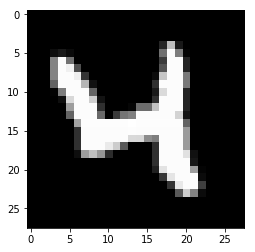

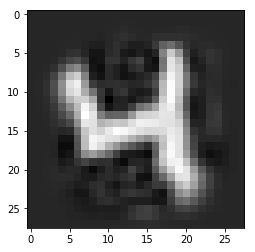

In [12]:
in_100_20 = (pca100.inverse_transform(components100))[20]
imgplot = plt.imshow(MNIST_data[20].reshape(28,28),'gray')
plt.show()
imgplot = plt.imshow(in_100_20.reshape(28,28),'gray')
plt.show()

Now for 100 components, we can see the basic shape for this digit clearly. Though some of the pixels did not calculate the gray scale right, and it appear a little darker than the original one, the basic components are correct for this digit.

In [13]:
diff_100_20 = abs(in_100_20 - MNIST_data[20])
print(np.sum(diff_100_20)/(784*255))

0.05765831408678664


In [14]:
pca400 = PCA(400)
components400 = pca400.fit_transform(MNIST_data)

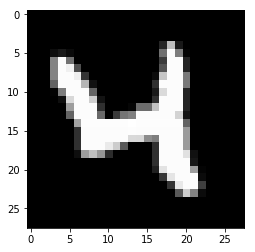

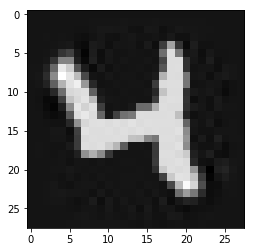

In [15]:
in_400_20 = (pca400.inverse_transform(components400))[20]
imgplot = plt.imshow(MNIST_data[20].reshape(28,28),'gray')
plt.show()
imgplot = plt.imshow(in_400_20.reshape(28,28),'gray')
plt.show()

For 400 components, we see that they are basicly same to each other.

In [16]:
diff_400_20 = abs(in_400_20 - MNIST_data[20])
print(np.sum(diff_400_20)/(784*255))

0.014176253869520412


Now let's try to calculate the PCA step by step.
<br>
To achieve this, I followed a tutorial from the internet: http://sebastianraschka.com/Articles/2014_pca_step_by_step.html

Firstly we need a mean vector, which here, is a 784 by 1 matrix that represents the mean value for one pixel for among all the samples.

In [17]:
MNIST_data_t = MNIST_data.T
mean_vector = MNIST_data_t.mean(1)
print(mean_vector.shape)

(784,)


From the mean vector, we can calculate the scatter matrix.

In [18]:
def cal_scatter(MNIST_data_t,mean_vector):
    scatter_matrix = np.zeros((784,784))
    for i in range(60000):
        scatter_matrix += (MNIST_data_t[:,i].reshape(784,1) - mean_vector).dot((MNIST_data_t[:,i].reshape(784,1) - mean_vector).T)
    print(scatter_matrix.shape)
    return scatter_matrix

But since it will take too long for the calculation, we can use the build-in function to calculate the covariance, too.

In [19]:
cov_mat = np.cov(MNIST_data_t)
print(cov_mat.shape)

(784, 784)


In [20]:
pca_covariance = pca.get_covariance()
print(np.sum(abs(pca_covariance - cov_mat)))

7.590879154624733e-07


I checked the 'cov_mat' with the covariance from the PCA package, there are little difference between them.

Now, from the covariance, we can get eigenvectors and eigenvalues.

In [21]:
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)
print(eig_val_cov.shape)
print(eig_vec_cov.shape)

(784,)
(784, 784)


D:\Anaconda\lib\site-packages\numpy\core\numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


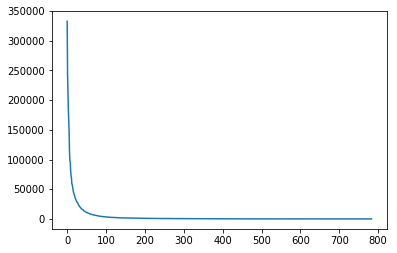

In [22]:
plt.plot(eig_val_cov)

I also checked the eigenvalues, it is already sorted, so we do not need to sort it again.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


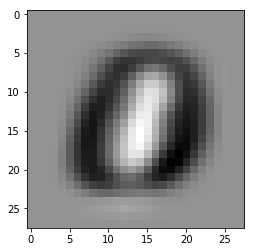

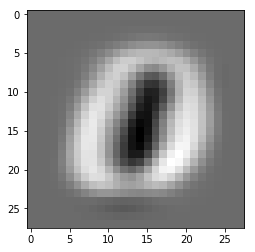

In [23]:
imgplot = plt.imshow(np.float32(eig_vec_cov[:,0]).reshape(28,28),'gray')
plt.show()
imgplot = plt.imshow((pca.components_)[0].reshape(28,28),'gray')
plt.show()

This is the plot for the first eigenvector, which is one of the components for the data set, tranformed to the image size. We see that it is almost like the components from the package, too.

Now, we can do the decomposition now.
<br>
For 10 components we can just use 10 'eig_vec_cov' (components) values.

In [24]:
transformed10 = eig_vec_cov[:,0:10].T.dot(MNIST_data_t)
print(transformed10.shape)

(10, 60000)


Back-construction.

In [25]:
back_trans10 = (transformed10.T)[20].dot((eig_vec_cov[:,0:10]).T)
print(back_trans10.shape)

(784,)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  


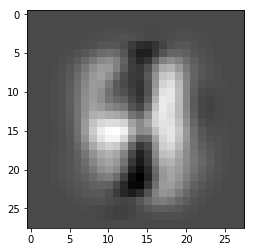

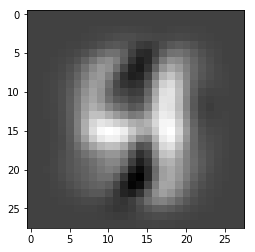

In [26]:
back_trans10_ima = back_trans10.T.reshape(28,28)
imgplot = plt.imshow(np.float32(back_trans10_ima),'gray')
plt.show()
imgplot = plt.imshow(in_10_20.reshape(28,28),'gray')
plt.show()

For a 10 components result, we see that both of them are not good.

100 components.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


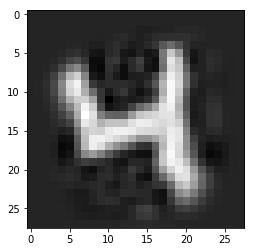

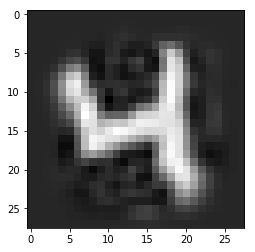

In [27]:
transformed100 = eig_vec_cov[:,0:100].T.dot(MNIST_data_t)
back_trans100 = (transformed100.T)[20].dot((eig_vec_cov[:,0:100]).T)
back_trans100_ima = back_trans100.T.reshape(28,28)
imgplot = plt.imshow(np.float32(back_trans100_ima),'gray')
plt.show()
imgplot = plt.imshow(in_100_20.reshape(28,28),'gray')
plt.show()

400 components.

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


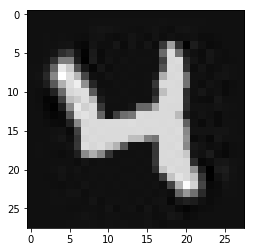

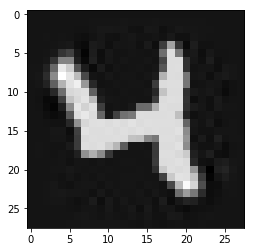

In [28]:
transformed400 = eig_vec_cov[:,0:400].T.dot(MNIST_data_t)
back_trans400 = (transformed400.T)[20].dot((eig_vec_cov[:,0:400]).T)
back_trans400_ima = back_trans400.T.reshape(28,28)
imgplot = plt.imshow(np.float32(back_trans400_ima),'gray')
plt.show()
imgplot = plt.imshow(in_400_20.reshape(28,28),'gray')
plt.show()

Difference between all of them.

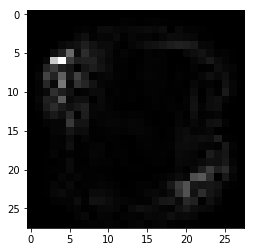

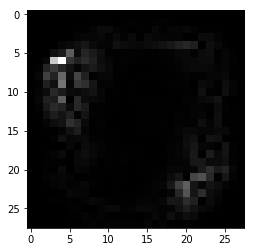

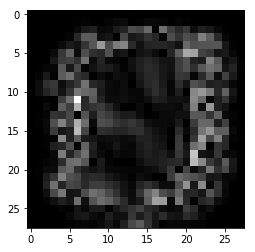

In [29]:
diff_pck_ima_400 = abs(MNIST_data[20] - in_400_20)
imgplot = plt.imshow(diff_pck_ima_400.reshape(28,28),'gray')
plt.show()
diff_self_ima_400 = abs(MNIST_data[20] - back_trans400.real)
imgplot = plt.imshow(diff_self_ima_400.reshape(28,28),'gray')
plt.show()
diff_self_pck_400 = abs(in_400_20 - back_trans400.real)
imgplot = plt.imshow(diff_self_pck_400.reshape(28,28),'gray')
plt.show()

Now, we confirmed that this digit set can be re-constructed by 100 components, and with 400 components, it will get nearly perfect results.